**Description** 

This Notebook is prepared with the examples displayed in the paper. It sets the workflow and functions for visualization.
1. SIC dataset
2. Walker Lake dataset

In [1]:
# Packages
import pygeostat as gs
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

warnings.simplefilter("ignore")
import subprocess
import sys
import time

import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.metrics import mean_squared_error

print(" ")
print("Packages versions:")
print(" ")
print("Pygeostat version :", gs.__version__)
print("Numpy version     :", np.__version__)
print("Pandas version    :", pd.__version__)
mpl.style.use("default")

# Directories
datdir = "./data/"
exedir = "./exes/"
outdir = "outputs/"
figdir = "figures/"

gs.mkdir(outdir)
gs.mkdir(figdir)

 
Packages versions:
 
Pygeostat version : 1.1.1
Numpy version     : 1.16.3
Pandas version    : 1.1.5


In [2]:
# defining plotting function for Geolocated variogram 2D
def plot_autovar2d(model,experimental,debug,xlimmaj,xlimmin,xlimter,ylim_vario):
    fig, axes = plt.subplots(1,2, figsize = (8,4))
    # Variogram model plots
    gs.variogram_plot(model, index = 1, experimental=False, ax = axes[0],color = 'blue',lw =2 , 
                               label = 'Major dir', plot_style = 'mpldefault' )
    gs.variogram_plot(model, index = 2, experimental=False, ax = axes[0],color = 'green' ,lw =2, 
                               label = 'Minor dir', plot_style = 'mpldefault' )
    # Variogram experimental points
    gs.variogram_plot(experimental, index = 1, experimental=True, ax = axes[0], color = 'blue',ylim = (0,ylim_vario),
                      xlim=(0,xlimmaj),label = 'Major dir', plot_style = 'mpldefault' )
    gs.variogram_plot(experimental, index = 2, experimental=True, ax = axes[0], color = 'green',ylim = (0,ylim_vario),
                      xlim=(0,xlimmin),label = 'Minor dir', plot_style = 'mpldefault' )
    ticks = np.round(np.arange(0,xlimmaj,xlimmaj/5),0).astype(int)
    axes[0].set_xticks(ticks)
    axes[0].set_xticklabels(ticks, fontsize = 10)
    # Labels
    axes[0].set_ylabel(r'$\gamma_{(h)}$     ',fontsize =18)
    axes[0].legend(loc='best',fontsize=11)
    axes[0].tick_params(axis='both', labelsize=10)
    # Directions plot
    x1, y1, z1 = [0, debug['x y z'][0]], [0, debug['x y z'][3]], [0, debug['x y z'][6]]
    x2, y2, z2 = [0, debug['x y z'][1]], [0, debug['x y z'][4]], [0, debug['x y z'][7]]  
    plt.quiver([0, 0], [0, 0], x1, y1, color='blue', angles='xy', scale_units='xy', scale=1)
    plt.quiver([0, 0], [0, 0], x2, y2, color='green', angles='xy', scale_units='xy', scale=1)
    axes[1].set_xlim(-1,1)
    axes[1].set_ylim(-1,1)
    ticks = [-1,-0.5,0,0.5,1]
    axes[1].set_yticks(ticks)
    axes[1].set_yticklabels(ticks, fontsize = 10)
    axes[1].set_xticklabels(ticks, fontsize = 10)
    axes[1].axvline(x=0, color='k', linestyle='-',linewidth=0.5)
    axes[1].axhline(y=0, color='k', linestyle='-',linewidth=0.5)
    axes[1].set_xlabel('X')
    axes[1].set_ylabel('Y', rotation=0)
    plt.tight_layout()
    plt.subplots_adjust(wspace = 0.25)

# Real datasets
* Include 2D: SIC dataset
* Test Walker Dataset

## SIC dataset

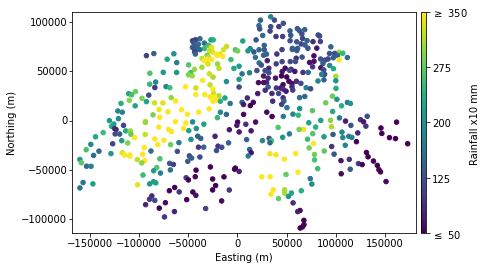

In [3]:
sic = gs.DataFile(datdir + "SIC_97.dat", x="x", y="y", tmin=-999999)
gs.location_plot(
    sic,
    var="rainfall_x10_mm",
    cmap="viridis",
    figsize=(8, 4),
    vlim=(50, 350),
    plot_style="mpldefault",
    title="",
    cbar_label="Rainfall x10 mm ",
)
gs.export_image(figdir + "sic_data.png")

In [4]:
autovar = gs.Program(exedir + "autovar.exe", getpar=True)

C:\Users\ldavi_wxqeft\Documents\Paper_publication\Code\autovar_1003\Notebook\tmp29fv7g57\Autovar.par has been copied to the clipboard


In [5]:
parstr = """                Parameters for Autovar
                ************************

START OF PARAMETERS:
{data}SIC_97.dat               -file with data
2  3  0  4  1                  -   columns for X,Y,Z,var,id
-1.0e21   1.0e21               -   trimming limits
0   1                          -Geolocated variogram? (1=yes), Number of anchors
anchor.out                     -file with anchors
2 3 4                          -X Y Z column of anchor file
0                              -Attemp to improve variogram?
0  2  4                        - Use general anisotropy ratio,maj/min,maj/ter
333 -159317.0 1000.0           -nx,xmn,xsiz
429 -108763.0 500.0            -ny,ymn,ysiz
1 0.5 1.0                      -nz,zmn,zsiz
outputs/autovarmod_sic.out     -file for variogram model output
outputs/autovar_sic.out        -   file for experimental pairs output
outputs/debug_sic.out          -   file for directions
outputs/varfit_sic.out         -   variogram model text GSLIB format
outputs/weights_sic.out        -   weights for each anchor
1                              -   Debug on screen (1=yes)
1                              - Disseminated(1) or stratigraphic(2) deposit type? 
"""
autovar.run(parstr=parstr.format(data=datdir), liveoutput=False)

Calling:  ['./exes/autovar.exe', 'temp']


General Variogram model
  3      0.00    -nst, nugget effect
  1      0.22     37.45      0.00      0.00    -it,cc,azm,dip,tilt
      27965.15      27965.15          0.00    -a_hmax, a_hmin, a_vert (ranges)
  1      0.76     37.45      0.00      0.00    -it,cc,azm,dip,tilt
     551429.26      48131.78          0.00    -a_hmax, a_hmin, a_vert (ranges)
  1      0.02     37.45      0.00      0.00    -it,cc,azm,dip,tilt
     551427.51      48183.54          0.00    -a_hmax, a_hmin, a_vert (ranges)



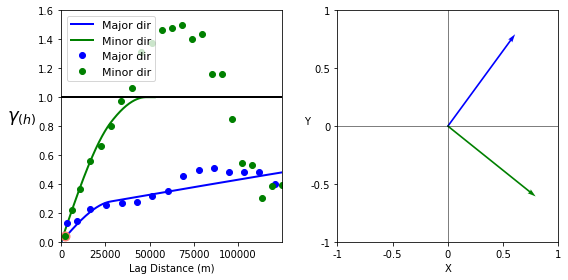

In [6]:
# Variograms and directions per anchor
model = gs.DataFile('outputs/autovarmod_sic.out')
exp = gs.DataFile('outputs/autovar_sic.out')
dbg = gs.DataFile('outputs/debug_sic.out')
xlimmaj=125000
xlimmin=125000
xlimter=100
plot_autovar2d(model,exp,dbg,xlimmaj,xlimmin,xlimter,1.6)
# Models
varfit = open('outputs/varfit_sic.out' , "r")
varfitc = varfit.read()

print("\033[1m"+'General Variogram model'+"\033[0m")
print(varfitc)
gs.export_image(figdir + 'sic_auto.png', dpi =300)

## Walker lake

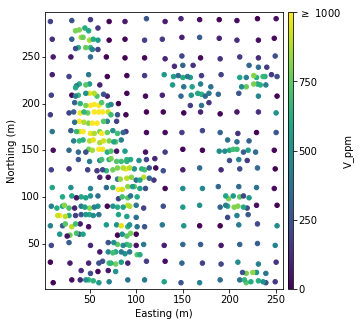

In [7]:
walker_samples = gs.DataFile(datdir + "walker_lake_samples_.dat")
gs.location_plot(walker_samples, var ='V_ppm', vlim = (0, 1000), figsize = (5,5), plot_style ='mpldefault',title ='',cbar_label ='V_ppm')
gs.export_image(figdir + "walker_data.png")

In [8]:
parstr = """                Parameters for Autovar
                ************************

START OF PARAMETERS:
{data}walker_lake_samples_.dat           -file with data
2  3  0  4  1                            -   columns for X,Y,Z,var,id
-1.0e21   1.0e21                         -   trimming limits
0   2                                    -Geolocated variogram? (1=yes), Number of anchors
{data}anchor.out                         -file with anchors
2 3 4                                    -X Y Z column of anchor file
0                                        -Attemp to improve variogram?
0  2  4                                  - Use general anisotropy ratio,maj/min,maj/ter
26 8.0 10.0                              -nx,xmn,xsiz
30 8.0 10.0                              -ny,ymn,ysiz
1 0.5 1.0                                -nz,zmn,zsiz
outputs/autovarmod_walker.out            -file for variogram model output
outputs/autovar_walker.out               -   file for experimental pairs output
outputs/debug_walker.out                 -   file for directions
outputs/varfit_walker.out                -   variogram model text GSLIB format
outputs/weights_walker.out               -   weights for each anchor
1                                        -   Debug on screen (1=yes)
1                                        - Disseminated(1) or stratigraphic(2) deposit type? 
"""
autovar.run(parstr=parstr.format(data=datdir), liveoutput=False)

Calling:  ['./exes/autovar.exe', 'temp']


General Variogram model
  3      0.00    -nst, nugget effect
  1      0.43    160.80      0.00      0.00    -it,cc,azm,dip,tilt
         18.96          2.55          0.00    -a_hmax, a_hmin, a_vert (ranges)
  1      0.35    160.80      0.00      0.00    -it,cc,azm,dip,tilt
         57.44         31.40          0.00    -a_hmax, a_hmin, a_vert (ranges)
  1      0.22    160.80      0.00      0.00    -it,cc,azm,dip,tilt
        366.39         31.42          0.00    -a_hmax, a_hmin, a_vert (ranges)



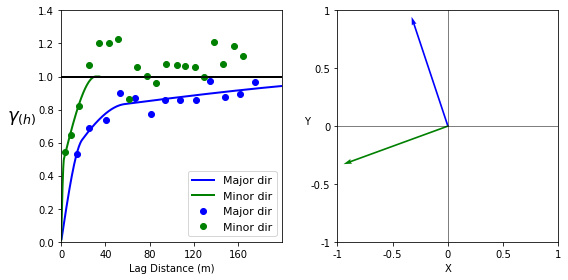

In [9]:
# Variograms and directions per anchor
model = gs.DataFile('outputs/autovarmod_walker.out')
exp = gs.DataFile('outputs/autovar_walker.out')
dbg = gs.DataFile('outputs/debug_walker.out')
xlimmaj=200
xlimmin=200
xlimter=100
plot_autovar2d(model,exp,dbg,xlimmaj,xlimmin,xlimter, 1.4)
# Models
varfit = open('outputs/varfit_walker.out' , "r")
varfitc = varfit.read()

print("\033[1m"+'General Variogram model'+"\033[0m")
print(varfitc)
gs.export_image(figdir + 'walker_auto.png', dpi =300)